<a href="https://colab.research.google.com/github/Kitty-Kat1997/IST597_Fall2019_TF2.0/blob/master/Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: Loss = 6.087161064147949
Epoch 100: Loss = 0.08948574215173721
Epoch 200: Loss = 0.08947477489709854
Epoch 300: Loss = 0.08947476744651794
Epoch 400: Loss = 0.08947476744651794
Epoch 500: Loss = 0.08947476744651794
Epoch 600: Loss = 0.08947476744651794
Epoch 700: Loss = 0.08947476744651794
Epoch 800: Loss = 0.08947476744651794
Epoch 900: Loss = 0.08947476744651794


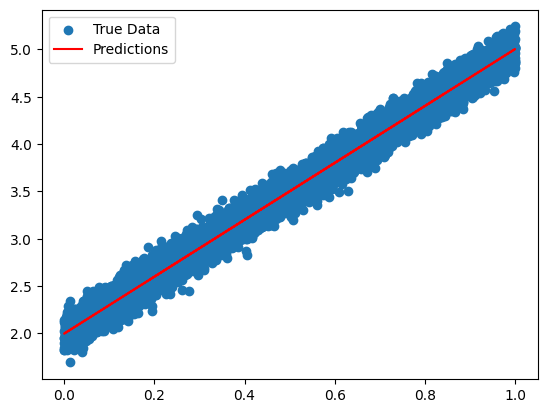

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

X = np.random.rand(10000, 1).astype(np.float32)
y_true = 3 * X + 2 + np.random.normal(0, 0.1, (10000, 1))  # Adding noise


W = tf.Variable(tf.random.normal([1, 1]))
b = tf.Variable(tf.random.normal([1]))


def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


def hybrid_loss(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred) + tf.square(y_true - y_pred))

learning_rate = 0.1
decay_factor = 0.5
optimizer = tf.optimizers.SGD(learning_rate)


for epoch in range(1000):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        loss = hybrid_loss(y_true, y_pred)
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy()}")


    if epoch > 0 and epoch % 200 == 0:
        optimizer.learning_rate.assign(optimizer.learning_rate * decay_factor)


plt.scatter(X, y_true, label='True Data')
plt.plot(X, tf.matmul(X, W) + b, color='red', label='Predictions')
plt.legend()
plt.show()